# Per group quantization

In [1]:
import torch 
from my_utils import *

def linear_q_symmetric_per_group(tensor, group_size, dtype = torch.int8):
    t_shape = tensor.shape
    # we need to make sure that each row is divisible by group size 
    assert t_shape[1] % group_size == 0
    assert tensor.dim() == 2
    tensor = tensor.view(-1, group_size)
    quantized_tensor, scale = linear_q_symmetric_per_channel(tensor, dim=0, dtype=dtype)
    quantized_tensor = quantized_tensor.view(t_shape)
    return quantized_tensor, scale  


In [6]:
def linear_dequantization_per_group(quantized_tensor, scale, group_size):
    q_shape = quantized_tensor.shape 
    quantized_tensor = quantized_tensor.view(-1,group_size)
    dequantized_tensor = linear_dequantization(quantized_tensor, scale, 0)
    dequantized_tensor = dequantized_tensor.view(q_shape)
    return dequantized_tensor


# Test

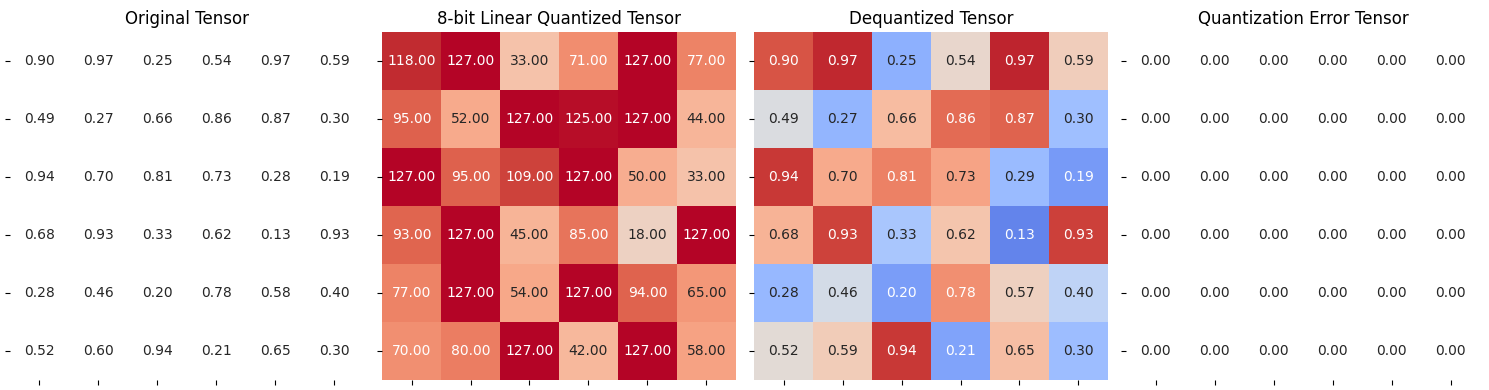

In [7]:
from helper import *

test_tensor = torch.rand((6,6))
group_size = 3

quantized_tensor, scale = linear_q_symmetric_per_group(test_tensor, group_size= group_size)
dequantized_tensor = linear_dequantization_per_group(quantized_tensor, scale, group_size)

plot_quantization_errors(test_tensor, quantized_tensor, dequantized_tensor)